# Phishing Website Detection
*group project by Melon_IT*

## Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, accuracy_score, roc_auc_score, auc, recall_score, precision_score, f1_score, classification_report, confusion_matrix, average_precision_score

## Dataset
source https://www.unb.ca/cic/datasets/url-2016.html

In [2]:
df = pd.read_csv('urls.csv')
df

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,wvk12-my.sharepoint.com,0,0,1,5,0,0,1,1,0,1,1,1,0,0,1,0,1
9996,adplife.com,0,0,1,4,0,0,0,0,0,1,0,1,0,0,1,0,1
9997,kurortnoye.com.ua,0,1,1,3,0,0,1,0,0,0,1,1,1,0,1,0,1
9998,norcaltc-my.sharepoint.com,0,0,1,5,0,0,1,1,0,1,1,1,0,0,1,0,1


<Axes: >

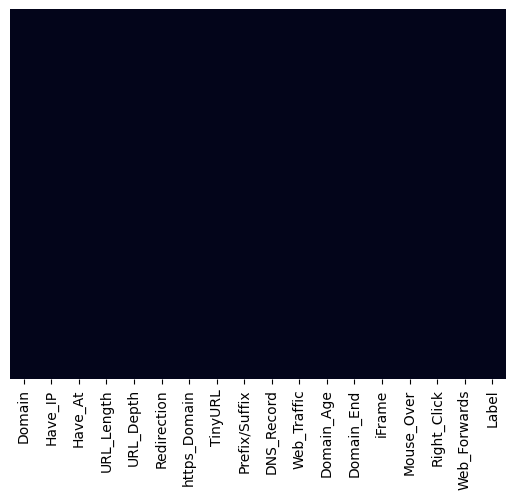

In [3]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False) #is ok with data

In [4]:
x = df.drop(['Label'] , axis = 1)
x = x.drop(['Domain'] , axis = 1)
y = df['Label']

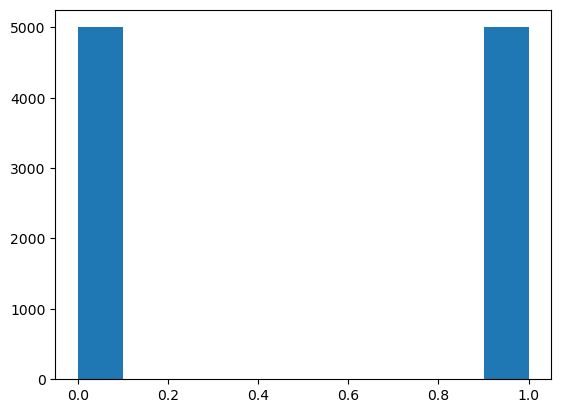

In [5]:
y_his = y.to_numpy()
plt.hist(y)
plt.show() #classes are balanced

# Machine Learning Models & Training
* LogisticRegression
* XGBoost
* GBoost
* RandomForest
* Random Forest with PCA

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [7]:
X_train

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards
9525,0,0,1,3,0,0,0,0,0,1,1,0,0,0,1,0
7470,0,0,1,5,0,0,0,0,0,1,1,1,0,0,1,0
7928,0,0,0,2,0,0,0,0,0,1,0,0,0,0,1,0
9088,0,0,1,4,0,0,0,0,0,1,1,1,0,0,1,0
8098,0,0,0,3,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009,0,0,1,2,0,0,0,0,0,1,0,0,1,1,1,1
9619,0,0,0,1,1,0,0,1,0,0,1,0,1,1,1,1
5229,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0
488,0,0,1,5,0,0,0,0,0,1,0,1,0,0,1,1


### LogisticRegression

In [8]:
model = LogisticRegression()
model.fit(X_train, y_train)

D:\conda\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [9]:
y_pred = model.predict(X_test)

In [10]:
prec_LR = precision_score(y_test, y_pred)
acc_LR = accuracy_score(y_test, y_pred)
recall_LR = recall_score(y_test, y_pred)
confusion_LR = confusion_matrix(y_test, y_pred)
f1_LR = f1_score(y_test, y_pred)
tn, fp, fn, tp = confusion_LR.ravel()
specificity_LR = tn / (tn + fp)

print("Accuracy", acc_LR, "\nPrecision: ",prec_LR, "\nRecall: ", recall_LR,"\nSpecificity:", specificity_LR,"\nF1:", f1_LR)

Accuracy 0.7835 
Precision:  0.9032697547683923 
Recall:  0.646829268292683 
Specificity: 0.9271794871794872 
F1: 0.7538374076179647


### XGBoost

In [11]:
xgb = XGBClassifier(learning_rate=0.3,max_depth=15)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [12]:
y_pred = xgb.predict(X_test)

In [13]:
prec_XGB = precision_score(y_test, y_pred)
acc_XGB = accuracy_score(y_test, y_pred)
recall_XGB = recall_score(y_test, y_pred)
f1_XGB = f1_score(y_test, y_pred)
confusion_XGB = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_XGB.ravel()
specificity_XGB = tn / (tn + fp)

print("Accuracy", acc_XGB, "\nPrecision: ",prec_XGB, "\nRecall: ", recall_XGB,"\nSpecificity", specificity_XGB,"\nF1:", f1_XGB)

Accuracy 0.8505 
Precision:  0.9240654205607477 
Recall:  0.7717073170731708 
Specificity 0.9333333333333333 
F1: 0.8410419989367358


### GBoost

In [14]:
model = GradientBoostingClassifier(n_estimators=50, max_depth=10, random_state=0)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)


prec_GB = precision_score(y_test, y_pred)
acc_GB = accuracy_score(y_test, y_pred)
recall_GB = recall_score(y_test, y_pred)
f1_GB = f1_score(y_test, y_pred)
confusion_GB = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_GB.ravel()
specificity_GB = tn / (tn + fp)

print("Accuracy", acc_GB, "\nPrecision: ",prec_GB, "\nRecall: ", recall_GB,"\nSpecificity", specificity_GB,"\nF1:", f1_GB)

Accuracy 0.8485 
Precision:  0.9297619047619048 
Recall:  0.7619512195121951 
Specificity 0.9394871794871795 
F1: 0.8375335120643431


Text(0.5, 1.0, 'Важность признаков')

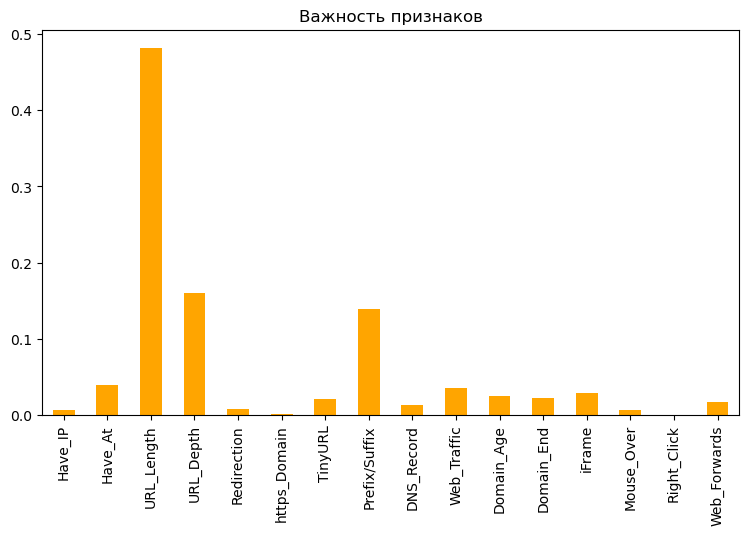

In [15]:
imp = model.feature_importances_
viz_imp = pd.Series(imp, X_train.columns)
fig, ax = plt.subplots(figsize=(9,5))
viz_imp.plot.bar(ax=ax, color="orange")
ax.set_title("Важность признаков")

### RandomForest

In [16]:
RFC = RandomForestClassifier(random_state=42, class_weight='balanced', max_depth=15)
RFC.fit(X_train, y_train)
y_pred = RFC.predict(X_test)

In [17]:
prec_RFC = precision_score(y_test, y_pred)
acc_RFC = accuracy_score(y_test, y_pred)
recall_RFC = recall_score(y_test, y_pred)
f1_RFC = f1_score(y_test, y_pred)
confusion_RFC = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_RFC.ravel()
specificity_RFC = tn / (tn + fp)

print("Accuracy", acc_RFC, "\nPrecision: ",prec_RFC, "\nRecall: ", recall_RFC,"\nSpecificity:", specificity_RFC,"\nF1:", f1_RFC) 

Accuracy 0.85 
Precision:  0.9362214199759326 
Recall:  0.7590243902439024 
Specificity: 0.9456410256410256 
F1: 0.8383620689655171


# Some results

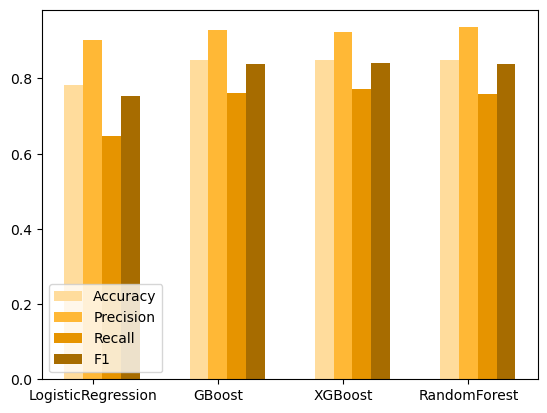

In [18]:
barWidth=0.15

Accuracy = [acc_LR,acc_GB,acc_XGB,acc_RFC] 
Precision = [prec_LR,prec_GB,prec_XGB,prec_RFC] 
Recall = [recall_LR,recall_GB,recall_XGB,recall_RFC]
f1 = [f1_LR,f1_GB,f1_XGB,f1_RFC]

br1 = np.arange(len(Accuracy)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3] 

plt.bar(br1, Accuracy, color ='#FFDC9C', width = barWidth, label ='Accuracy') 
plt.bar(br2, Precision, color ='#FFB836', width = barWidth, label ='Precision') 
plt.bar(br3, Recall, color ='#E69400', width = barWidth, label ='Recall')
plt.bar(br4, f1, color ='#A76C00', width = barWidth, label ='F1')

plt.xticks([r + barWidth for r in range(len(Accuracy))], 
        ['LogisticRegression', 'GBoost', 'XGBoost','RandomForest'])

plt.legend(loc= 'lower left')
plt.show() 

C:\Users\79132\AppData\Local\Temp\ipykernel_32224\718377163.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'r--', color = "brown")


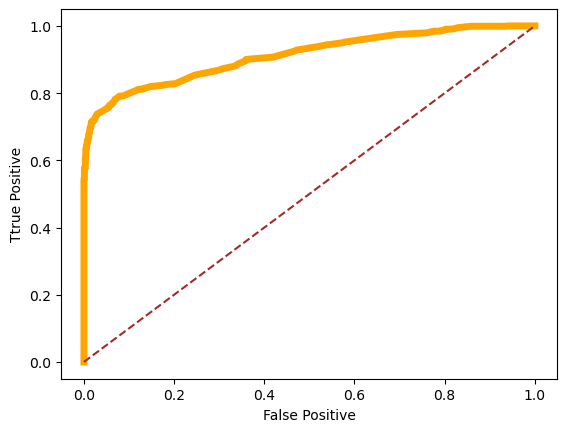

Площадь: 0.9109298311444654


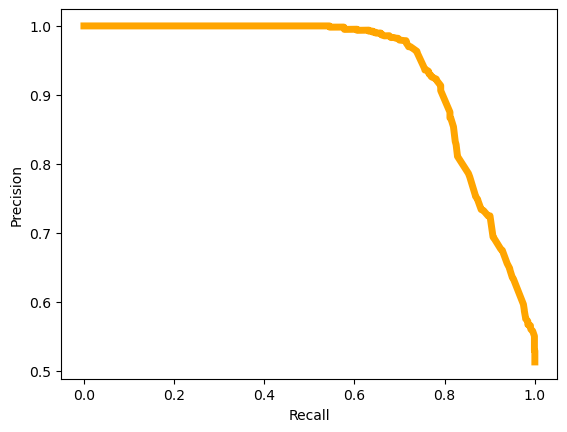

Площадь 0.9357917308254825


In [19]:
y_pred_proba = RFC.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color = "#FFA500", linewidth = 5)
plt.plot([0, 1], [0, 1], 'r--', color = "brown")
plt.xlabel('False Positive')
plt.ylabel('Ttrue Positive')
plt.show()
roc_auc = auc(fpr, tpr)
print("Площадь:", roc_auc)

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

plt.figure()
plt.plot(recall, precision, color = "#FFA500", linewidth = 5)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

pr_auc = auc(recall, precision)
print("Площадь", pr_auc)

## How can I improve Recall?

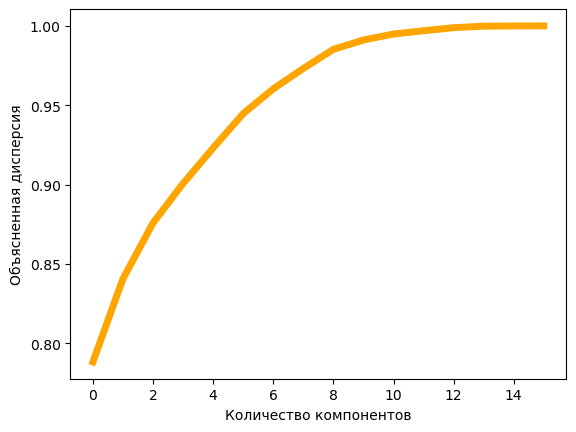

In [20]:
from sklearn.decomposition import PCA

pca = PCA().fit(X_train)
n_components = pca.explained_variance_ratio_.shape[0]
plt.plot(np.cumsum(pca.explained_variance_ratio_), color = "orange", linewidth = 5)
plt.xlabel('Количество компонентов')
plt.ylabel('Объясненная дисперсия')
plt.show()

In [21]:
components = 6
pca = PCA(n_components=components)
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.fit_transform(X_test)

print("Дисперсия каждой компоненты: ", pca.explained_variance_ratio_)
print("Общая объясненная дисперсия: ", round(sum(list(pca.explained_variance_ratio_)) * 100, 2))

Дисперсия каждой компоненты:  [0.80649287 0.04792538 0.02930618 0.0231935  0.02174686 0.0200085 ]
Общая объясненная дисперсия:  94.87


In [22]:
pca_cols = []
for i in range(components):
    pca_cols.append(f"PC_{i}")

pca_df = pd.DataFrame(X_pca_train, columns=pca_cols)

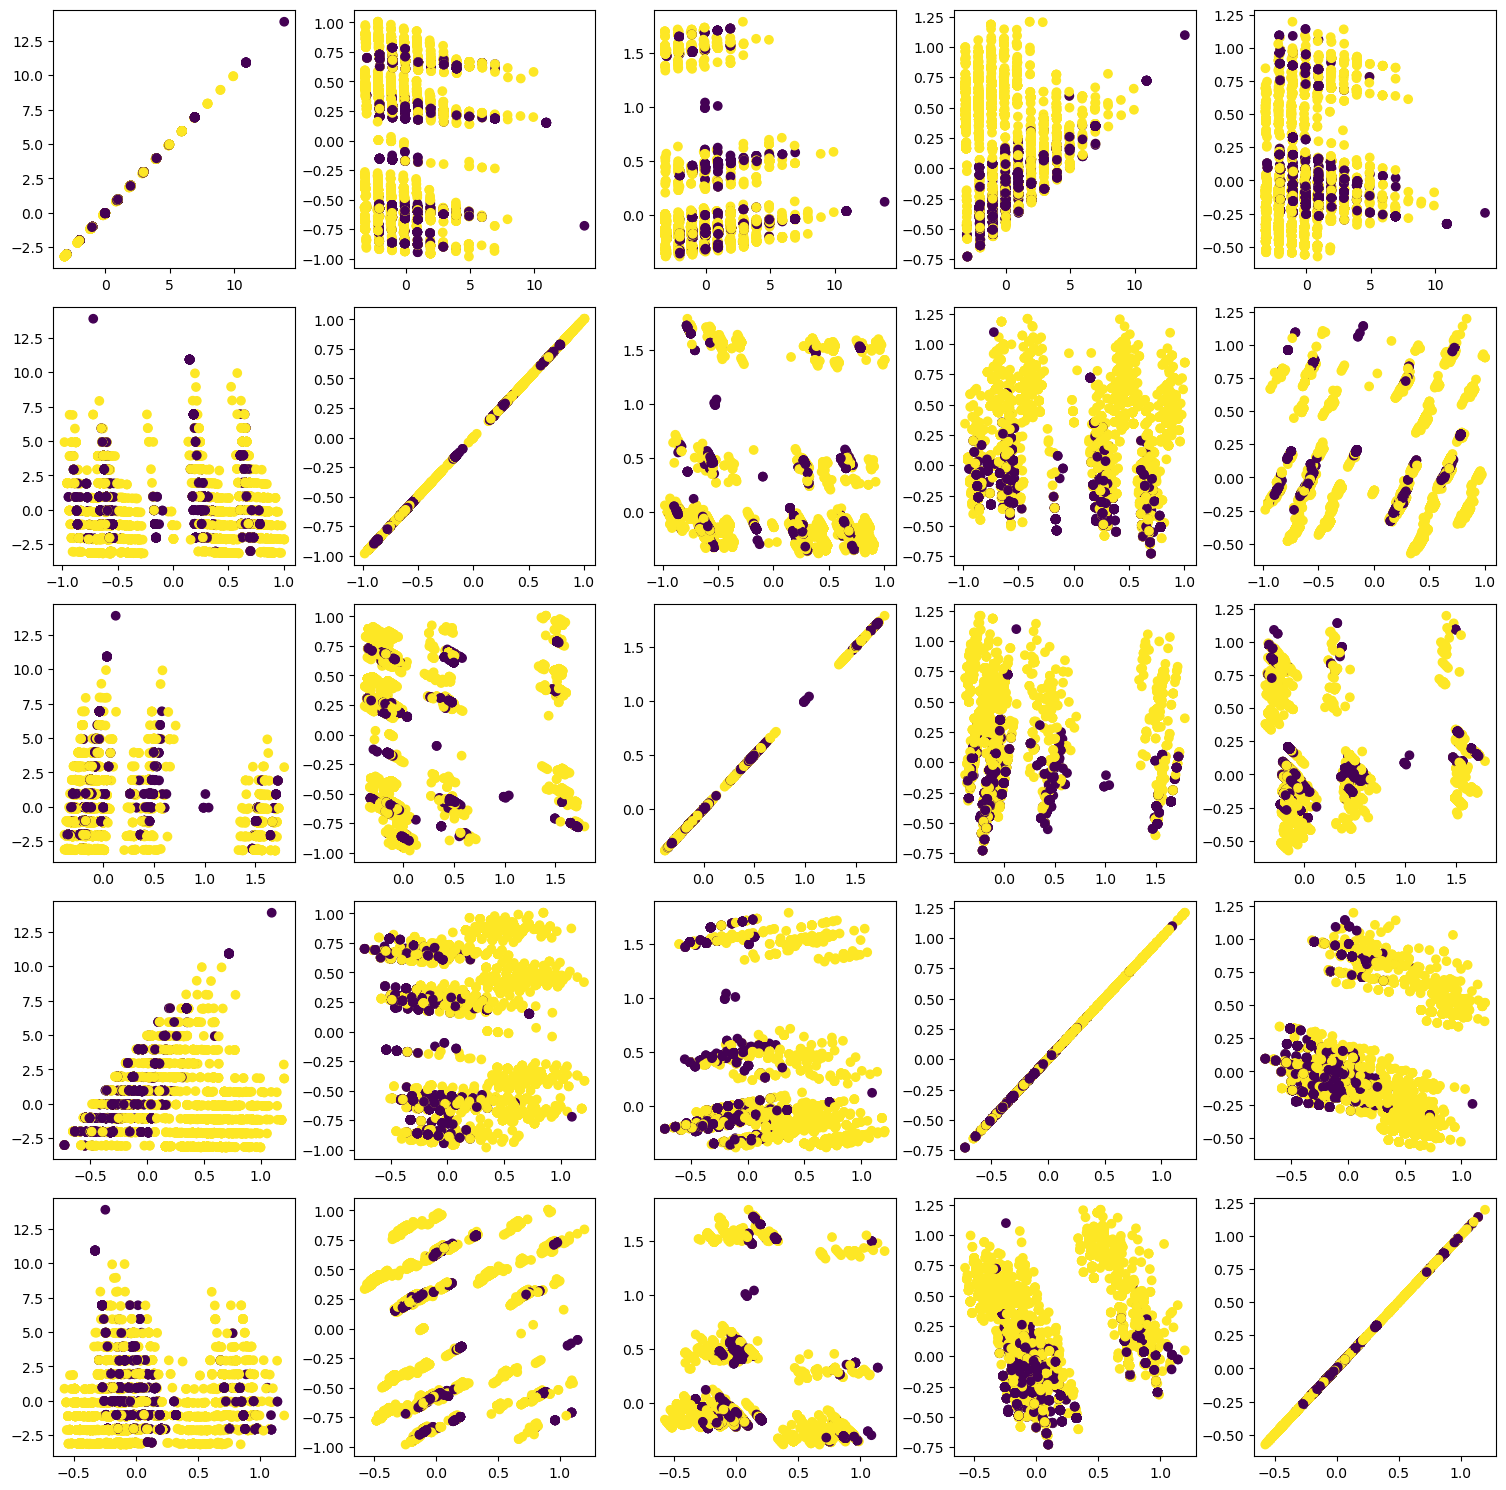

In [23]:
fig, axs = plt.subplots(components-1, components-1, figsize=(15, 15))
for i in range(components-1):
    for j in range(components-1):
        axs[i,j].scatter(X_pca_train[:,i], X_pca_train[:, j], c=y_train)
        
plt.tight_layout()
plt.show()

In [24]:
RFC = RandomForestClassifier(random_state=42, class_weight='balanced', max_depth=10)
RFC.fit(X_pca_train, y_train)
y_pred = RFC.predict(X_pca_test)

In [25]:
prec_RFC_PCA = precision_score(y_test, y_pred)
acc_RFC_PCA = accuracy_score(y_test, y_pred)
recall_RFC_PCA = recall_score(y_test, y_pred)
f1_RFC_PCA = f1_score(y_test, y_pred)
confusion_RFC_PCA = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_RFC_PCA.ravel()
specificity_RFC_PCA = tn / (tn + fp)

print("Accuracy", acc_RFC_PCA, "\nPrecision: ",prec_RFC_PCA, "\nRecall: ", recall_RFC_PCA,"\nSpecificity:", specificity_RFC_PCA,"\nF1:", f1_RFC_PCA) 

Accuracy 0.688 
Precision:  0.6644790812141099 
Recall:  0.7902439024390244 
Specificity: 0.5805128205128205 
F1: 0.7219251336898397


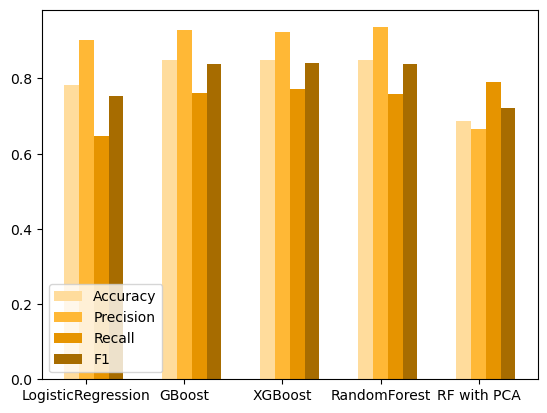

In [26]:
Accuracy = [acc_LR,acc_GB,acc_XGB, acc_RFC,acc_RFC_PCA] 
Precision = [prec_LR,prec_GB,prec_XGB,prec_RFC,prec_RFC_PCA] 
Recall = [recall_LR,recall_GB,recall_XGB,recall_RFC,recall_RFC_PCA] 
f1 = [f1_LR,f1_GB,f1_XGB, f1_RFC, f1_RFC_PCA]

br1 = np.arange(len(Accuracy)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]  

plt.bar(br1, Accuracy, color ='#FFDC9C', width = barWidth, label ='Accuracy') 
plt.bar(br2, Precision, color ='#FFB836', width = barWidth, label ='Precision') 
plt.bar(br3, Recall, color ='#E69400', width = barWidth, label ='Recall')
plt.bar(br4, f1, color ='#A76C00', width = barWidth, label ='F1')


plt.xticks([r + barWidth for r in range(len(Accuracy))], 
        ['LogisticRegression', 'GBoost', 'XGBoost','RandomForest','RF with PCA'])

plt.legend(loc= 'lower left')
plt.show() 

### PCA didn't help us  😭😭😭😭😭😭